In [46]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

In [47]:
iris = datasets.load_iris()

In [48]:
X = iris.data
X.shape

(150, 4)

In [49]:
y = iris.target
y.shape

(150,)

### HoldOut Validation Approuch - Train Test split

مشکل جدا سازی ترین و تست به شیوه معمول این است که در هر دفعه که ما اسپبیت را انجام دهیم 
نتایج متفاوتی را با فیت کردن مدل بدست می اوریم.
و لذا مطمئن نیستیم که دقیقا کدام اسپلبت برا فیت کردن بهتر است

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [51]:
X_train.shape , y_train.shape

((120, 4), (120,))

In [52]:
from sklearn.svm import SVC

In [62]:
svm1 = SVC()
svm1.fit(X_train, y_train)
result = svm1.score(X_test, y_test)
print(result)

0.9333333333333333


## K Fold Cross Validation

برای جایی که بخواهیم به کا قسمت داده های آموزشی خود را تقسم کرده و اعتبار سنجی کنیم

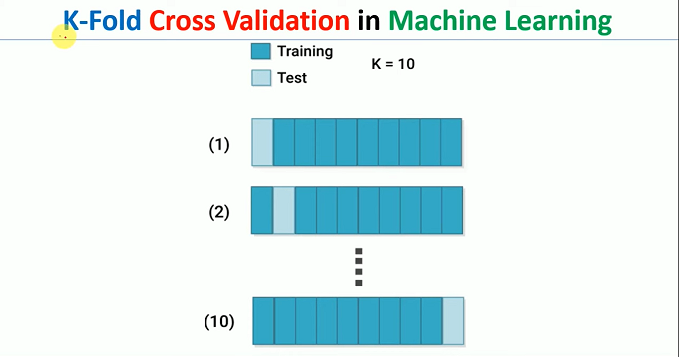

In [54]:
from sklearn.model_selection import KFold
svm1= SVC()
kfold_validation = KFold(15)

In [55]:
from sklearn.model_selection import cross_val_score
result2 =cross_val_score(svm1,X, y, cv=kfold_validation)
print(result2)
result2.mean()

[1.  1.  1.  1.  1.  1.  1.  0.7 0.9 1.  0.9 0.9 0.9 0.8 1. ]


0.9400000000000001

### Stratified KFOld Cross Validation

برای جایی تارگت ما خیلی بالانس نباشند مشکل زیر اتفاق می افند و کافولد ناکارآمد می شود:

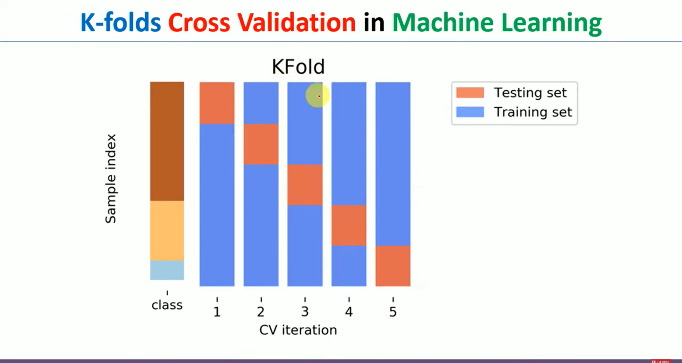

لذا برای برطرف کردن این عدم بالانس بودن تارگت ها از تابع استراتید کافولد استفاده میکنیم:

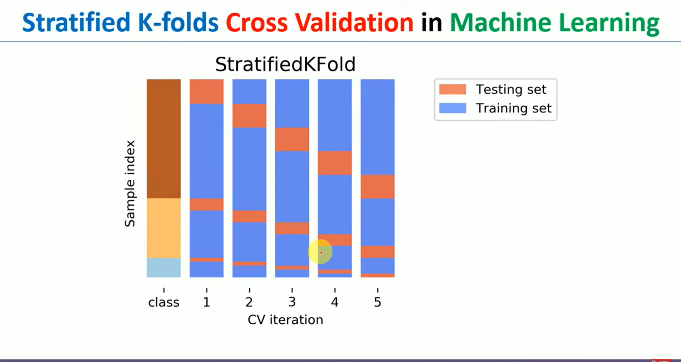

In [ ]:
from sklearn.model_selection import StratifiedKFold
svm1 = SVC()
skfold = StratifiedKFold(n_splits=10)

In [45]:
result3 = cross_val_score(svm1, X, y,cv=skfold)
print(result3)
result3.mean()

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 0.93333333 1.         1.        ]


0.9733333333333334

### Leave One Out Cross Validation (LOOCV)

برای جایی که بخواهیم کا را به تعداد مجموعه داده هایمان تقسیم کنیم و هر دفه یک قسمت را برای اعتبار سنجی استفاده کنیم

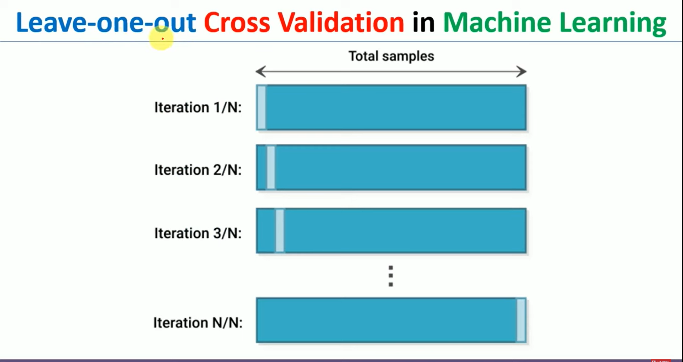

In [43]:
from sklearn.model_selection import LeaveOneOut
svm1 = SVC()
LOOCV = LeaveOneOut()

In [44]:
result4 = cross_val_score(svm1, X, y, cv=LOOCV)
print(result4)
result4.mean()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


0.9666666666666667

### Repeated random test train split
In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [71]:
from sklearn.model_selection import ShuffleSplit
svm1= SVC()
SF_split = ShuffleSplit(n_splits=10 ,test_size=0.2)

In [72]:
result5 = cross_val_score(svm1, X, y, cv=SF_split)
print(result5)
result5.mean()

[0.93333333 1.         1.         1.         0.86666667 0.9
 0.96666667 1.         0.96666667 1.        ]


0.9633333333333333